In [1]:
import numpy as np

import matplotlib.pyplot as plt

from simnn.activations import *
from simnn.costs import *
from simnn.layers import *
from simnn.model import *
from simnn.utils import *

from dataset.bin_mnist_35.load_bin_mnist_35 import load_data

In [2]:
# load data
train_fnames = ['dataset/bin_mnist_35/new_train3.txt', 'dataset/bin_mnist_35/new_train5.txt']
X_train, Y_train = load_data(train_fnames)
# create one hot vectors for each label
Y_t = np.zeros(Y_train.shape, dtype=float)[:,np.newaxis]; Y_t[np.where(Y_train == 5.)] = 1.
# Y_train = one_hot(Y_t)

# create dataset
dataset = (X_train, Y_t)

In [3]:
# load data
test_fnames = ['dataset/bin_mnist_35/new_test3.txt', 'dataset/bin_mnist_35/new_test5.txt']
X_test, Y_test = load_data(test_fnames)
# create one hot vectors for each label
Y_te = np.zeros(Y_test.shape, dtype=float)[:,np.newaxis]; Y_te[np.where(Y_test == 5.)] = 1.
# Y_train = one_hot(Y_t)

# create dataset
testset = (X_test, Y_te)

print(Y_te.shape)

(800, 1)


In [4]:
# define model structure
layers = [Linear(out_shape=1, activation=Logistic_Sigmoid(), bias=True, init='lecun_normal')]

# instantiate model
model = Model(layers, dataset, BinaryCrossEntropy(), bin_class_task=True, class_task=True)

# fit model to data
model.fit(dataset, val_set=testset, num_epochs=64, b_size=64, initial_learn=1e-3, aneal_T=15, verbose=True)

Epoch: 3, time: 0.1975s, with train cost 484.9, Train Acc 0.9029, Val Acc 0.9012

/Users/vchiley/SIMNN/simnn/model.py:244: UserWarning: Training set not split equally by b_size
  warnings.warn('Training set not split equally by b_size')


Epoch: 63, time: 1.004s, with train cost 245.4, Train Acc 0.9486, Val Acc 0.94557

Final cost: 0.17530405731937077
Final accuracy rate: 0.9485714285714286
Max accuracy rate: 0.9492857142857143
Final testing accuracy rate: 0.945


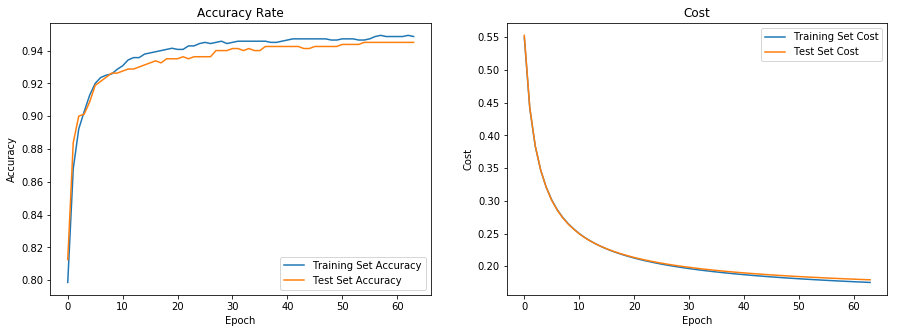

In [5]:
print('Final cost: {}'.format(model.cost_e[-1]))
print('Final accuracy rate: {}'.format(model.acc_e[-1]))
print('Max accuracy rate: {}'.format(np.max(model.acc_e)))

print('Final testing accuracy rate: {}'.format(model.v_acc_e[-1]))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(model.acc_e, label='Training Set Accuracy')
ax1.plot(model.v_acc_e, label='Test Set Accuracy')
ax1.legend()
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Rate')
ax2.plot(model.cost_e, label='Training Set Cost')
ax2.plot(model.v_cost_e, label='Test Set Cost')
ax2.legend()
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Cost')
ax2.set_title('Cost')
plt.show()

In [6]:
print(model)

Model, in_shape: 64, out_shape: 1, 
with layers:
Linear Layer, in_shape: 64, out_shape: 1, and has bias: True, 
Sigmoid, shortcut: True
and cost: BinaryCrossEntropy
